In [25]:
import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt
import pandas            as pd
import lsqfit
import itertools
import sys
from tqdm import tqdm
import os

In [26]:
from b2heavy.ThreePointFunctions.utils import read_config_fit, dump_fit_object
from b2heavy.FnalHISQMetadata import params as mdata

sys.path.append('/Users/pietro/code/software/B2heavy/routines')
from routines.fit_2pts_dispersion_relation import mom_to_p2, mom_to_pvec, extract_energies, extract_single_energy
from routines.fit_2pts_dispersion_relation import dispersion_relation_lsqfit as disprel
from routines.fit_2pts_dispersion_relation import dispersion_relation        as disprel_plot
from routines.fit_2pts_dispersion_relation import fit_disp_rel, fit_disp_rel_jk, plot_disp_rel, disprel_priors

In [42]:
mes = 'D'
frm = '/Users/pietro/Desktop/lattice24/0.25/corr2_3'
JK    = True
JKFIT = True

enslist = [['MediumCoarse','Coarse-2','Coarse-1','Coarse-Phys'],['Fine-1','Fine-Phys','SuperFine']]
# enslist = [['Coarse-2','Coarse-1','Coarse-Phys'],['Fine-1','Fine-Phys','SuperFine']]
# enslist = [['Coarse-2','Coarse-1'],['Coarse-Phys','Fine-1']]

In [43]:
priors = dict(
    M1 = gv.gvar(0.5,1.5),
    M2 = gv.gvar(0.5,1.5),
    M4 = gv.gvar(0.5,1.5),
    w4 = gv.gvar(0.,2.5)
)

Least Square Fit:
  chi2/dof [dof] = 0.31 [8]    Q = 0.96    logGBF = 16.122

Parameters:
             M1   1.1846 (12)     [  0.5 (1.5) ]  
             M2    1.342 (50)     [  0.5 (1.5) ]  
             M4     1.02 (13)     [  0.5 (1.5) ]  
             w4     0.02 (19)     [    0 ± 2.5 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 10/0.0)
  fitter = scipy_least_squares    method = trf



100%|██████████| 279/279 [00:01<00:00, 185.20it/s]


Least Square Fit:
  chi2/dof [dof] = 0.081 [6]    Q = 1    logGBF = 9.8089

Parameters:
             M1   1.01556 (50)      [  0.5 (1.5) ]  
             M2     1.146 (26)      [  0.5 (1.5) ]  
             M4      0.93 (13)      [  0.5 (1.5) ]  
             w4      0.11 (39)      [    0 ± 2.5 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 8/0.0)
  fitter = scipy_least_squares    method = trf



100%|██████████| 65/65 [00:00<00:00, 223.37it/s]


Least Square Fit:
  chi2/dof [dof] = 0.61 [6]    Q = 0.72    logGBF = 12.054

Parameters:
             M1   1.00563 (63)      [  0.5 (1.5) ]  
             M2     1.152 (38)      [  0.5 (1.5) ]  
             M4      1.02 (30)      [  0.5 (1.5) ]  
             w4      0.32 (54)      [    0 ± 2.5 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 9/0.0)
  fitter = scipy_least_squares    method = trf



100%|██████████| 90/90 [00:00<00:00, 212.29it/s]


Least Square Fit:
  chi2/dof [dof] = 0.84 [8]    Q = 0.57    logGBF = 22.442

Parameters:
             M1   1.00022 (40)      [  0.5 (1.5) ]  
             M2     1.137 (31)      [  0.5 (1.5) ]  
             M4      1.12 (37)      [  0.5 (1.5) ]  
             w4      0.74 (44)      [    0 ± 2.5 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 10/0.0)
  fitter = scipy_least_squares    method = trf



100%|██████████| 51/51 [00:00<00:00, 180.99it/s]


Least Square Fit:
  chi2/dof [dof] = 0.43 [8]    Q = 0.9    logGBF = 25.107

Parameters:
             M1   0.77599 (35)      [  0.5 (1.5) ]  
             M2     0.877 (17)      [  0.5 (1.5) ]  
             M4      0.92 (19)      [  0.5 (1.5) ]  
             w4      0.60 (62)      [    0 ± 2.5 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 6/0.0)
  fitter = scipy_least_squares    method = trf



100%|██████████| 63/63 [00:00<00:00, 214.74it/s]


Least Square Fit:
  chi2/dof [dof] = 1.5 [8]    Q = 0.14    logGBF = 24.811

Parameters:
             M1   0.77109 (34)      [  0.5 (1.5) ]  
             M2     0.858 (24)      [  0.5 (1.5) ]  
             M4      0.99 (40)      [  0.5 (1.5) ]  
             w4      0.23 (74)      [    0 ± 2.5 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 7/0.0)
  fitter = scipy_least_squares    method = trf



100%|██████████| 95/95 [00:00<00:00, 208.53it/s]


Least Square Fit:
  chi2/dof [dof] = 0.37 [8]    Q = 0.93    logGBF = 33.4

Parameters:
             M1   0.51944 (24)      [  0.5 (1.5) ]  
             M2     0.521 (13)      [  0.5 (1.5) ]  
             M4     0.429 (54)      [  0.5 (1.5) ]  
             w4      1.0 (1.8)      [    0 ± 2.5 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 6/0.0)
  fitter = scipy_least_squares    method = trf



100%|██████████| 46/46 [00:00<00:00, 219.12it/s]


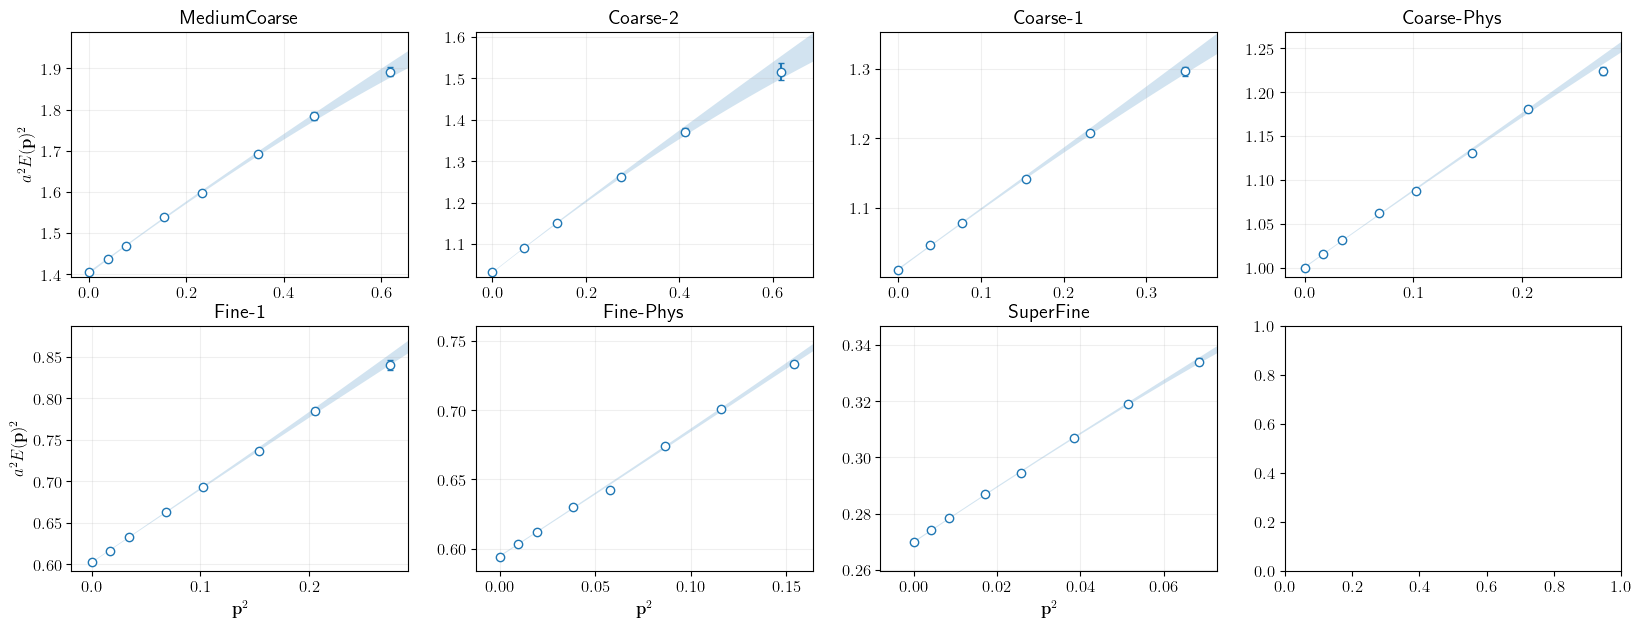

In [45]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(2,4,figsize=(20,7))
# fig, ax = plt.subplots(2,3,figsize=(10,7))

ergs = {}
moms = {}
fits = []
for i,row in enumerate(enslist):
    for j,ens in enumerate(row):
        Lvol   = mdata(ens)['L']

        tag = f'{ens}_{mes}'

        es = extract_energies(ens,mes,jk=JK,readfrom=frm,sort=True)

        # priors = disprel_priors(mdata(ens))

        fit = fit_disp_rel(es, Lvol=Lvol, priors=priors)
        popt = fit_disp_rel_jk(fit,es) if JKFIT else fit.p

        results = {k:popt[k] for k in popt} 
        results['ensemble'] = ens
        fits.append(results)


        plot_disp_rel(ax[i,j], fit, popt, Lvol=Lvol, fmt='o', ecolor='C0', mfc='w', capsize=2.5)

        ergs[ens] = fit.y
        moms[ens] = fit.x

        de = (max(gv.mean(fit.y)) - min(gv.mean(fit.y)))/5
        ax[i,j].set_ylim(ymax=max(gv.mean(fit.y))+de, ymin = min(gv.mean(fit.y))-0.01)


        ax[i,j].set_title(ens)
        ax[i,j].grid(alpha=0.2)

        if j==0:
            ax[i,j].set_ylabel(r'$a^2 E(\mathbf{p})^2$')
        if i==1:
            ax[i,j].set_xlabel(r'$\mathbf{p}^2$')

plt.savefig(f'/Users/pietro/Desktop/disprel_{mes}_fit.pdf')

`['000', '100', '110', '200', '211', '300', '222', '400']`

In [46]:
res = pd.DataFrame(fits).set_index('ensemble')
res

,M1,M2,M4,w4
ensemble,,,,
MediumCoarse,1.1846(12),1.342(49),1.03(13),0.02(19)
Coarse-2,1.01556(50),1.146(26),0.93(13),0.11(38)
Coarse-1,1.00563(62),1.152(36),1.02(27),0.32(49)
Coarse-Phys,1.00022(38),1.136(28),1.13(31),0.73(40)
Fine-1,0.77599(35),0.877(17),0.92(19),0.60(58)
Fine-Phys,0.77109(33),0.858(22),0.99(33),0.23(68)
SuperFine,0.51944(24),0.521(13),0.430(49),1.0(1.2)


In [47]:
# pars = res.loc['MediumCoarse']
# mom = '400'
# pvec = mom_to_pvec(mom,L=mdata('MediumCoarse')['L'])
# disprel_plot(np.array(pvec),pars['M1'],pars['M2'],pars['M4'],pars['w4'])

In [50]:
kwargs = {
    'MediumCoarse': dict(fmt='o', color=f'C0', mfc='w', capsize=2.5, label=r'$a\sim 0.15$ fm, $am_l/am_s\sim $[phys]'),
    'Coarse-2'    : dict(fmt='o', color=f'C1', mfc='w', capsize=2.5, label=r'$a\sim 0.12$ fm, $am_l/am_s\sim 0.2$'   ), 
    'Coarse-1'    : dict(fmt='^', color=f'C1', mfc='w', capsize=2.5, label=r'$a\sim 0.12$ fm, $am_l/am_s\sim 0.1$'   ),
    'Coarse-Phys' : dict(fmt='X', color=f'C1', mfc='w', capsize=2.5, label=r'$a\sim 0.12$ fm, $am_l/am_s\sim $[phys]'),
    'Fine-1'      : dict(fmt='o', color=f'C2', mfc='w', capsize=2.5, label=r'$a\sim 0.09$ fm, $am_l/am_s\sim 0.1$'   ),
    'Fine-Phys'   : dict(fmt='^', color=f'C2', mfc='w', capsize=2.5, label=r'$a\sim 0.09$ fm, $am_l/am_s\sim $[phys]'),
    'SuperFine'   : dict(fmt='o', color=f'C3', mfc='w', capsize=2.5, label=r'$a\sim 0.06$ fm, $am_l/am_s\sim $[phys]'),
}

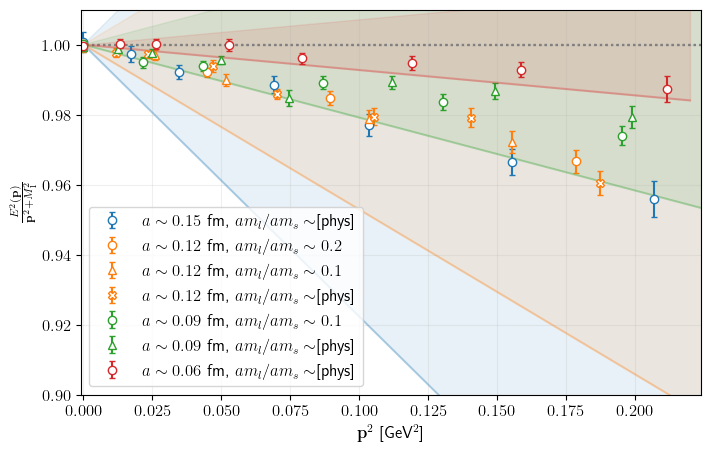

In [51]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

for i,ens in enumerate(ergs):
    alphas = mdata(ens)['alphaS']
    a = mdata(ens)['aSpc'].mean

    es = ergs[ens]
    p2 = np.sum(np.array(moms[ens])**2,axis=1)
    
    num = es
    den = p2 + res['M1'].loc[ens]**2

    xplot = p2/a**2/100
    yplot = num/gv.mean(den)
    # yplot = num/den

    ax.errorbar(xplot,gv.mean(yplot),gv.sdev(yplot),**kwargs[ens])

    ax.axhline(1.,color='gray',alpha=0.5,linestyle=':')

    if ens in ['MediumCoarse','Coarse-2','Fine-1','SuperFine']:
        endp = max(xplot)+xplot[1]
        xcone = np.arange(0,endp,0.01)
        ycone = xcone*100 * alphas * a**2
        ax.fill_between(xcone, 1+ycone,1-ycone,alpha=0.1,color=kwargs[ens]['color'])
        ax.plot(xcone, 1-ycone,alpha=0.3,color=kwargs[ens]['color'])

ax.set_xlim(xmin=-0.001,xmax=endp-0.001)

ax.set_ylabel(r'$\frac{E^2(\mathbf{p})}{\mathbf{p}^2 + M_1^2}$')
# ax.set_xlabel(r'$a^2\mathbf{p}^2$')
ax.set_xlabel(r'$\mathbf{p}^2$ [GeV$^2$]')
ax.set_ylim(ymax=1.01,ymin=0.9)


ax.grid(alpha=0.2)
ax.legend()

plt.savefig(f'/Users/pietro/Desktop/disprel_{mes}_discr.pdf')

# Recoil parameter

In [52]:
fits

[{'M1': 1.1846(12),
  'M2': 1.342(49),
  'M4': 1.03(13),
  'w4': 0.02(19),
  'ensemble': 'MediumCoarse'},
 {'M1': 1.01556(50),
  'M2': 1.146(26),
  'M4': 0.93(13),
  'w4': 0.11(38),
  'ensemble': 'Coarse-2'},
 {'M1': 1.00563(62),
  'M2': 1.152(36),
  'M4': 1.02(27),
  'w4': 0.32(49),
  'ensemble': 'Coarse-1'},
 {'M1': 1.00022(38),
  'M2': 1.136(28),
  'M4': 1.13(31),
  'w4': 0.73(40),
  'ensemble': 'Coarse-Phys'},
 {'M1': 0.77599(35),
  'M2': 0.877(17),
  'M4': 0.92(19),
  'w4': 0.60(58),
  'ensemble': 'Fine-1'},
 {'M1': 0.77109(33),
  'M2': 0.858(22),
  'M4': 0.99(33),
  'w4': 0.23(68),
  'ensemble': 'Fine-Phys'},
 {'M1': 0.51944(24),
  'M2': 0.521(13),
  'M4': 0.430(49),
  'w4': 1.0(1.2),
  'ensemble': 'SuperFine'}]